In [125]:
#!pip install xgboost
#!pip install streamlit

In [164]:
# import neccessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from joblib import dump

In [127]:
# Load and Explore the Dataset

dframe = pd.read_csv("C:\\Users\\User\\Documents\\SEMESTER 3 MODULES\\7150CEM\\Project\\Loan Default Prediction Dataset export 2025-07-25 16-47-24.csv")

dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [128]:
dframe.head()  # First few rows

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [129]:
dframe.describe()  # Summary statistics for numerical columns

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [130]:
dframe.info

<bound method DataFrame.info of             LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0       I38PQUQS96   56   85994       50587          520              80   
1       HPSK72WA7R   69   50432      124440          458              15   
2       C1OZ6DPJ8Y   46   84208      129188          451              26   
3       V2KKSFM3UN   32   31713       44799          743               0   
4       EY08JDHTZP   60   20437        9139          633               8   
...            ...  ...     ...         ...          ...             ...   
255342  8C6S86ESGC   19   37979      210682          541             109   
255343  98R4KDHNND   32   51953      189899          511              14   
255344  XQK1UUUNGP   56   84820      208294          597              70   
255345  JAO28CPL4H   42   85109       60575          809              40   
255346  ZTH91CGL0B   62   22418       18481          636             113   

        NumCreditLines  InterestRate  LoanTerm  DTIRati

In [131]:
dframe.shape

(255347, 18)

### DATA CLEANING

In [132]:
# Check for missing values

print(dframe.isnull().sum())  # Count of missing values per column

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


<Axes: >

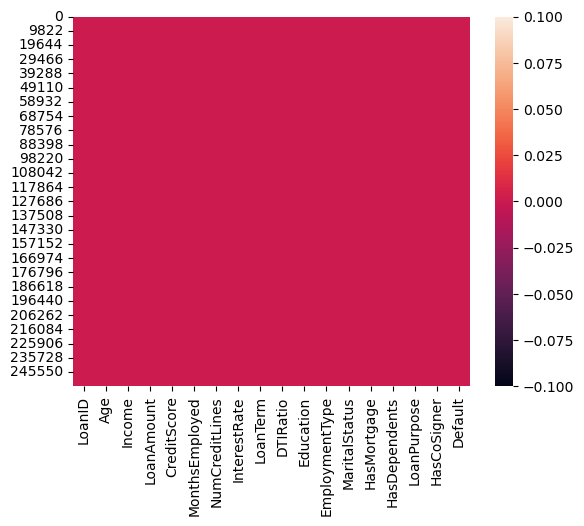

In [133]:
# Plotting heatmap to confirm no missing values
sns.heatmap(dframe.isnull())

In [134]:
# Check Duplicate Values

dframe.duplicated().sum()

0

In [135]:
# Drop irrelevant columns
dframe.drop("LoanID", axis=1, inplace=True)
dframe.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1


### Exploratory Data Analysis

##### Univariate Analysis

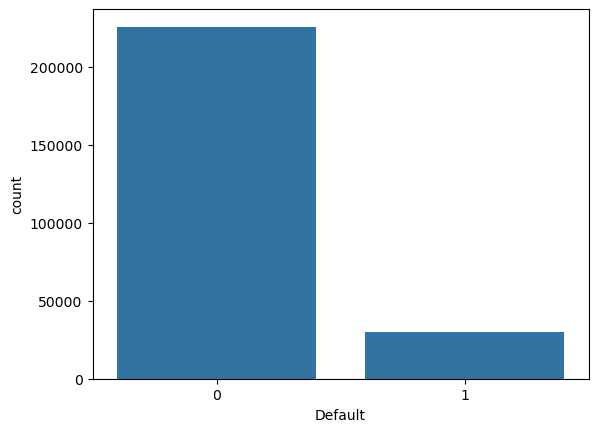

In [136]:
# Target variable  distribution

sns.countplot(x=dframe["Default"]);

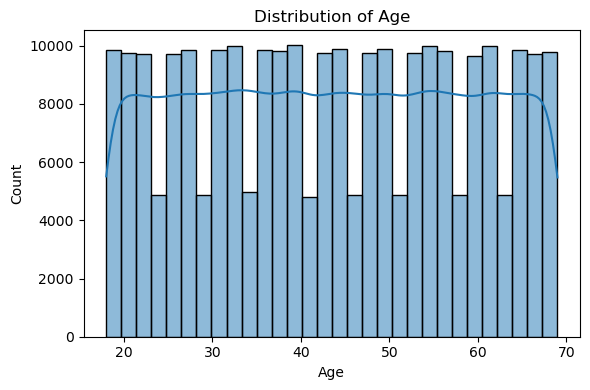

In [137]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(dframe['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### Bivariate Analysis -> Checking relationship between two variables/features

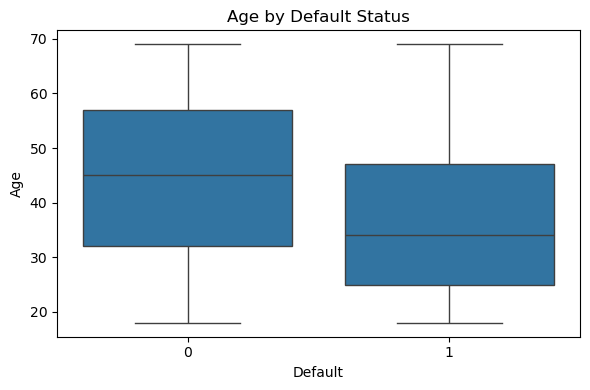

In [138]:
# Default by Age
plt.figure(figsize=(6,4))
sns.boxplot(data=dframe, x='Default', y='Age')
plt.title('Age by Default Status')
plt.tight_layout()
plt.show()

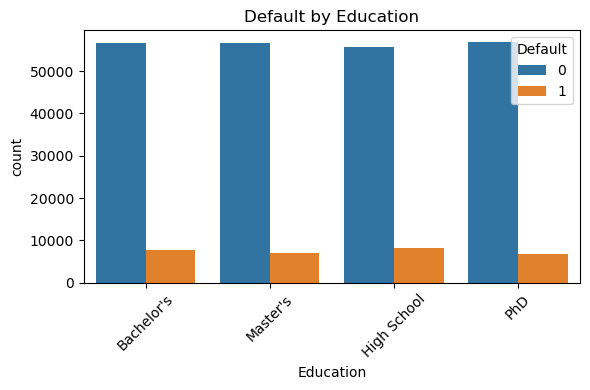

In [139]:
# Default by Education
plt.figure(figsize=(6,4))
sns.countplot(data=dframe, x='Education', hue='Default')
plt.title('Default by Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

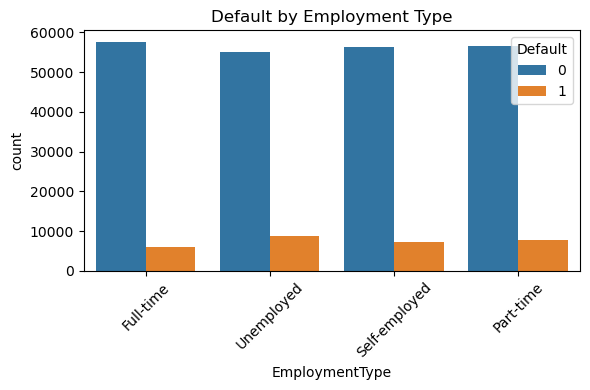

In [140]:
# Default by EmploymentType
plt.figure(figsize=(6,4))
sns.countplot(data=dframe, x='EmploymentType', hue='Default')
plt.title('Default by Employment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

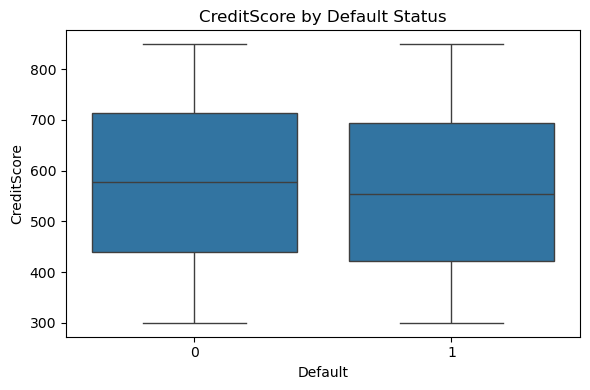

In [141]:
# Default by Creditscore
plt.figure(figsize=(6,4))
sns.boxplot(data=dframe, x='Default', y='CreditScore')
plt.title('CreditScore by Default Status')
plt.tight_layout()
plt.show()

##### Multivariate Analysis -> Analyzing multiple features

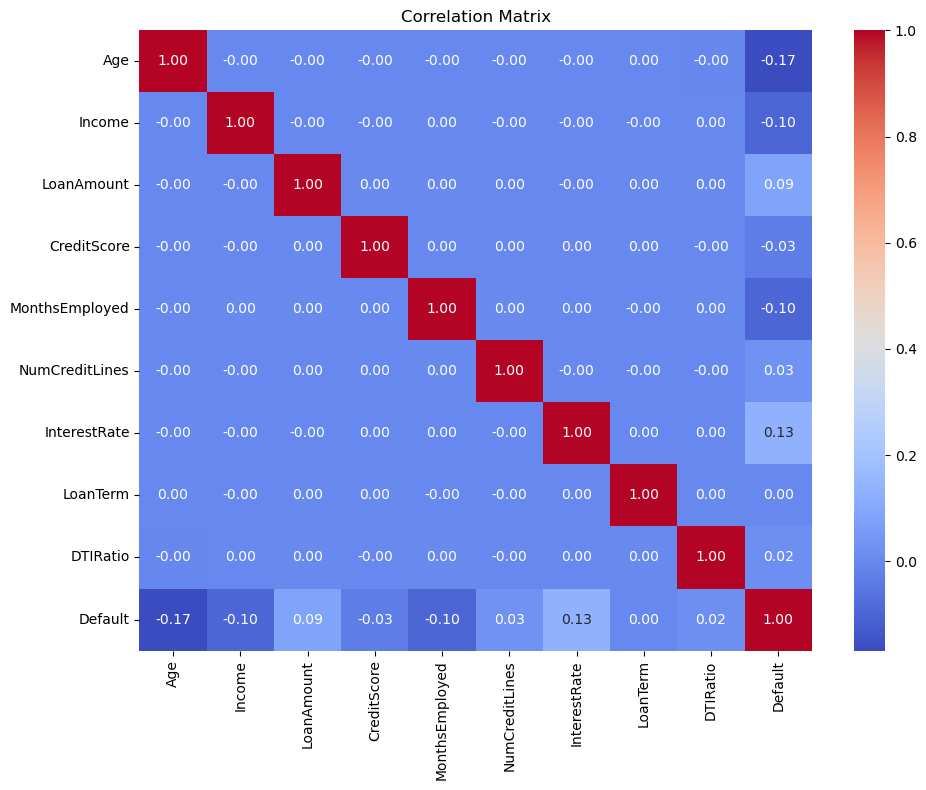

In [142]:
# Correlation Heatmap(Numeric Variables)
plt.figure(figsize=(10,8))
sns.heatmap(dframe[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10488\144926640.py:5: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\User\anaconda3.12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


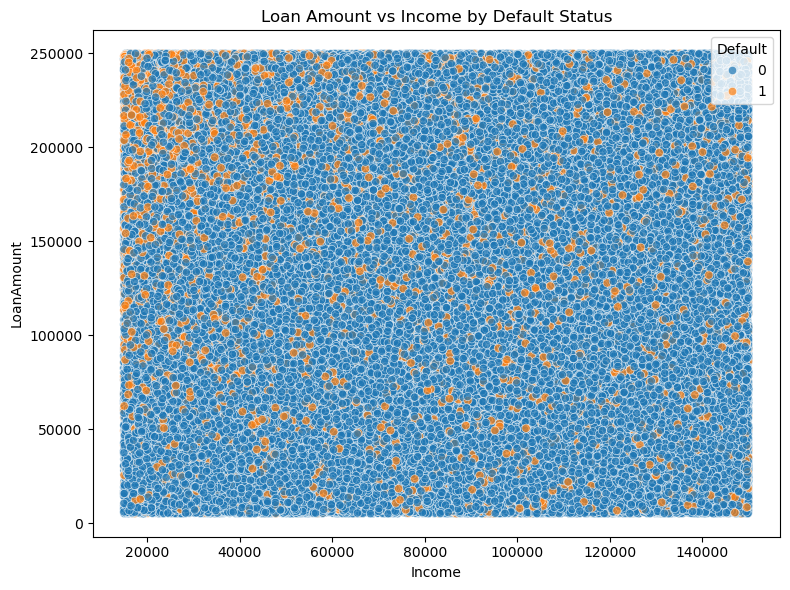

In [143]:
# Loan amount vs Income vs Default
plt.figure(figsize=(8,6))
sns.scatterplot(data=dframe, x='Income', y='LoanAmount', hue='Default', alpha=0.7)
plt.title('Loan Amount vs Income by Default Status')
plt.tight_layout()
plt.show()

### DATA PRE-PROCESSING

In [144]:
label = dframe["Default"] # dependent variable
label

0         0
1         0
2         1
3         0
4         0
         ..
255342    0
255343    1
255344    0
255345    0
255346    0
Name: Default, Length: 255347, dtype: int64

In [145]:
features = dframe.drop("Default", axis=1) # independent variables
features.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No


### Encoding categorical variables
##### Using Label Encoding

In [146]:
categorical_data = dframe.select_dtypes(include=['object','category'])
categorical_data.head(3)

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No


In [147]:
# Let's convert categorical features into numerical features
# Creating an of the encoder

encoder = LabelEncoder()
for column_name in categorical_data:
    features[column_name] = encoder.fit_transform(dframe[column_name])

In [148]:
features.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0


### SUPERVISED MACHINE LEARNING

In [149]:
# Splitting into training (70%) and testing (30%) sets

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

### Model Training

#### Logistics Regression

In [150]:
# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

C:\Users\User\anaconda3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [151]:
# Predict on the test set
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [152]:
# Evaluation of model
report = classification_report(y_test, predictions, digits=5)
print(report)

              precision    recall  f1-score   support

           0    0.88477   0.99913   0.93848     67681
           1    0.66477   0.01311   0.02571      8924

    accuracy                        0.88426     76605
   macro avg    0.77477   0.50612   0.48210     76605
weighted avg    0.85914   0.88426   0.83215     76605



In [153]:
# Initialize the Scaler
scaler = MinMaxScaler()
X_train_Sfeat = scaler.fit_transform(X_train)
X_test_Sfeat = scaler.transform(X_test)

In [154]:
# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_Sfeat, y_train)

# Predict on the test set
predictions = model.predict(X_test_Sfeat)
matrix = confusion_matrix(y_test, predictions)

# Evaluate model
report = classification_report(y_test, predictions, digits=5)
print(report)


              precision    recall  f1-score   support

           0    0.88650   0.99752   0.93874     67681
           1    0.62500   0.03138   0.05975      8924

    accuracy                        0.88497     76605
   macro avg    0.75575   0.51445   0.49924     76605
weighted avg    0.85603   0.88497   0.83634     76605



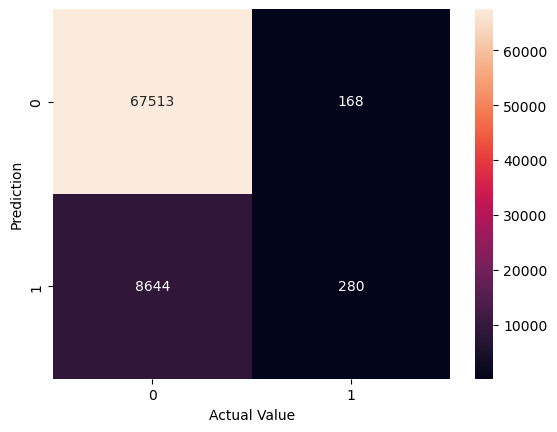

In [155]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value");

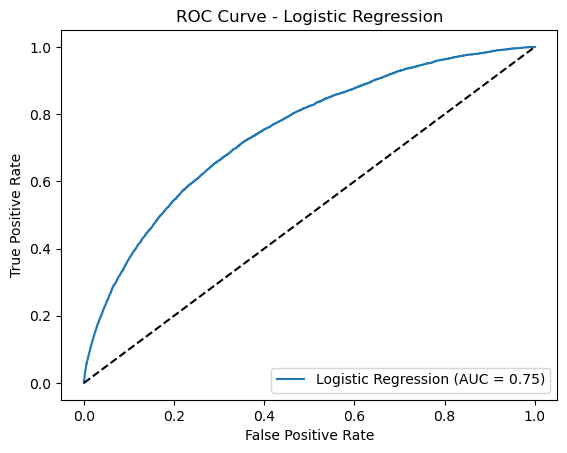

In [156]:
# Get predicted probabilities
probs = model.predict_proba(X_test_Sfeat)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [157]:
# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(X_train_Sfeat, y_train)

# Predict on the test set
predictions = model.predict(X_test_Sfeat)
matrix = confusion_matrix(y_test, predictions)

# Evaluate model
report = classification_report(y_test, predictions, digits=5)
print(report)


              precision    recall  f1-score   support

           0    0.88803   0.99675   0.93925     67681
           1    0.65517   0.04684   0.08743      8924

    accuracy                        0.88609     76605
   macro avg    0.77160   0.52179   0.51334     76605
weighted avg    0.86090   0.88609   0.84002     76605



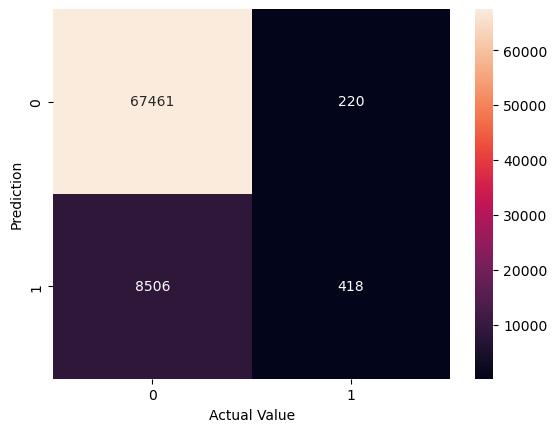

In [158]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value");

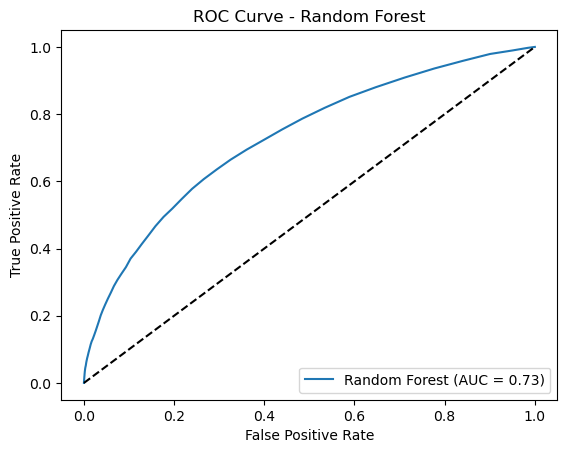

In [159]:
probs = model.predict_proba(X_test_Sfeat)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [160]:
# Initialize model
model = XGBClassifier(eval_metric="logloss", random_state=42)

# Train model
model.fit(X_train_Sfeat, y_train)

# Predict on the test set
predictions = model.predict(X_test_Sfeat)
matrix = confusion_matrix(y_test, predictions)

# Evaluate model
report = classification_report(y_test, predictions, digits=5)
print(report)

              precision    recall  f1-score   support

           0    0.89154   0.99072   0.93852     67681
           1    0.54982   0.08595   0.14866      8924

    accuracy                        0.88532     76605
   macro avg    0.72068   0.53833   0.54359     76605
weighted avg    0.85174   0.88532   0.84651     76605



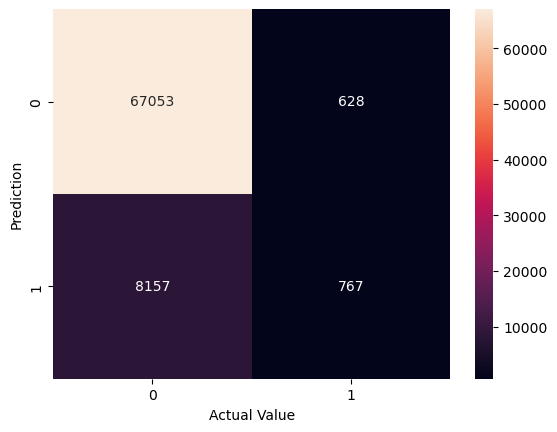

In [161]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value");

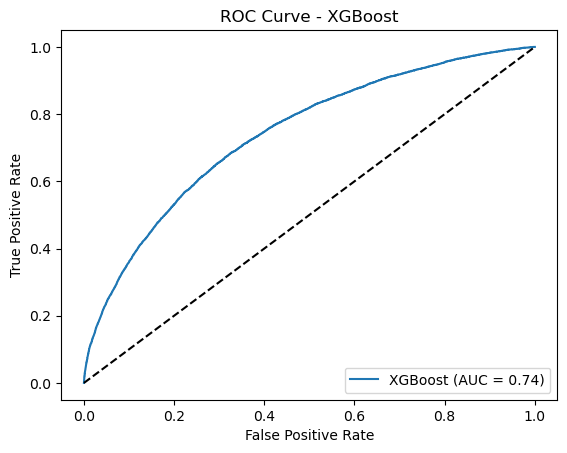

In [162]:
probs = model.predict_proba(X_test_Sfeat)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

### Hyperparameter Tuning

In [165]:
# Define models and their hyperparameter grids
models_and_params = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric="logloss", random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 10],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0]
        }
    }
}

# Store results
best_models = {}

# Loop through each model
for name, config in models_and_params.items():
    print(f"\n🔍 Tuning {name}...")
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_Sfeat, y_train)
    
    best_models[name] = {
        'best_estimator': grid.best_estimator_,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_
    }
    print(f"✅ Best Score for {name}: {grid.best_score_:.4f}")
    print(f"📌 Best Params: {grid.best_params_}")

# Identify top performer
top_model = max(best_models.items(), key=lambda x: x[1]['best_score'])
print(f"\n🏆 Top Model: {top_model[0]} with score {top_model[1]['best_score']:.4f}")


🔍 Tuning Logistic Regression...
✅ Best Score for Logistic Regression: 0.8853
📌 Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}

🔍 Tuning Random Forest...
✅ Best Score for Random Forest: 0.8861
📌 Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

🔍 Tuning XGBoost...
✅ Best Score for XGBoost: 0.8864
📌 Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}

🏆 Top Model: XGBoost with score 0.8864


In [169]:
# Let's save the top-performing model

dump(top_model, 'L_Default.joblib')

['L_Default.joblib']